In [1]:
import pandas

data = pandas.read_csv("data/Clean_Quasar_Data.csv")

X = data[['W1_FLUX_LUMINOSITY', 'W2_FLUX_LUMINOSITY']]

y = data['BAL_PROB']

print(data.shape)
print(X.shape)
print(y.shape)
print(y.value_counts())

(336523, 44)
(336523, 2)
(336523,)
BAL_PROB
Non-BAL    313425
BAL         23098
Name: count, dtype: int64


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Splits data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

# Align indices of y_train with X_train
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Trains the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=365, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=365)

In [3]:
## PREDICT AND EVALUATE ON TEST SET
# Uses test set to create predictions
test_predictions = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Confusion Matrix
test_conf_matrix = confusion_matrix(y_test, test_predictions)
print(f'Confusion Matrix:\n{test_conf_matrix}')

# Detailed Classification Report
test_class_report = classification_report(y_test, test_predictions)
print(f'Classification Report:\n{test_class_report}')

# Feature Importances
feature_importances = rf_model.feature_importances_

importance_df = pandas.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", importance_df)

Test Accuracy: 0.9231
Confusion Matrix:
[[  184  4414]
 [  761 61946]]
Classification Report:
              precision    recall  f1-score   support

         BAL       0.19      0.04      0.07      4598
     Non-BAL       0.93      0.99      0.96     62707

    accuracy                           0.92     67305
   macro avg       0.56      0.51      0.51     67305
weighted avg       0.88      0.92      0.90     67305

Feature Importances:
               Feature  Importance
1  W2_FLUX_LUMINOSITY     0.51603
0  W1_FLUX_LUMINOSITY     0.48397


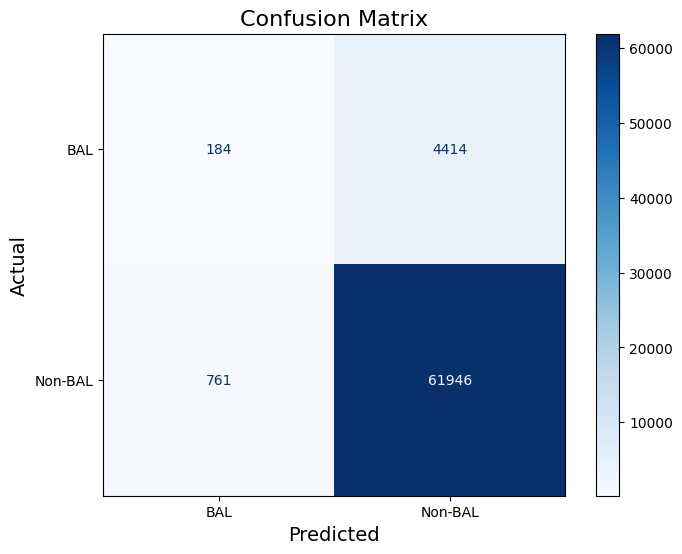

C:\Users\james\AppData\Local\Temp\ipykernel_42480\267729992.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(


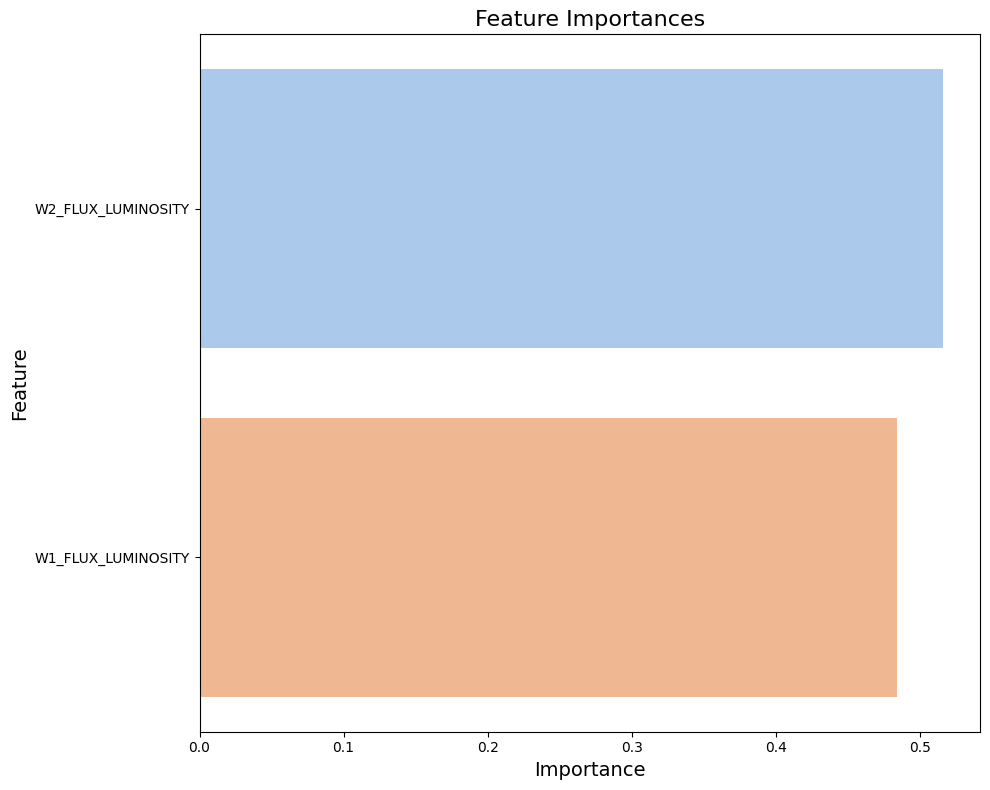

In [4]:
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import ConfusionMatrixDisplay

# CONFUSION MATRIX VISUALIZATION
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    test_predictions,
    cmap="Blues",
    ax=ax,
    colorbar=True
)
ax.set_title("Confusion Matrix", fontsize=16)
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
plt.show()

# FEATURE IMPORTANCES VISUALIZATION
plt.figure(figsize=(10, 8))
sorted_importance_df = importance_df.head(19)
seaborn.barplot(
    x="Importance", 
    y="Feature", 
    data=sorted_importance_df,
    palette="pastel"
)
plt.title("Feature Importances", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()

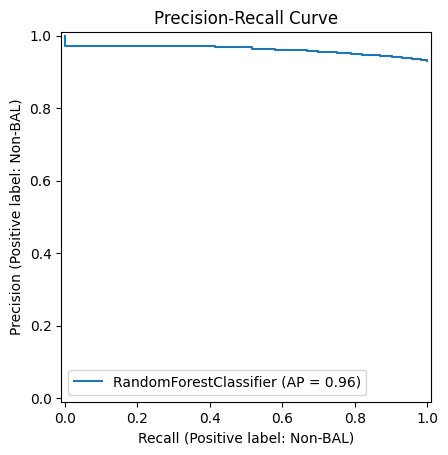

In [5]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()

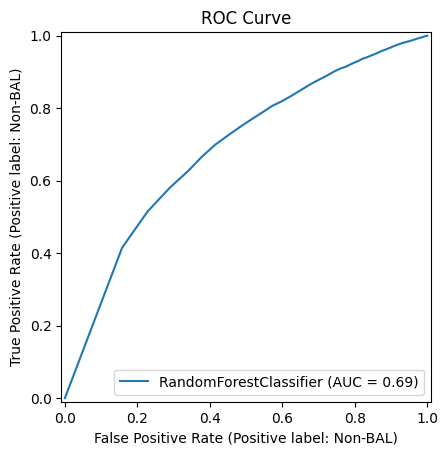

In [6]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()